The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.assign` instead.
  return method(self._obj, *args, **kwargs)
/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)
/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/missingno/missingno.py:72: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name w

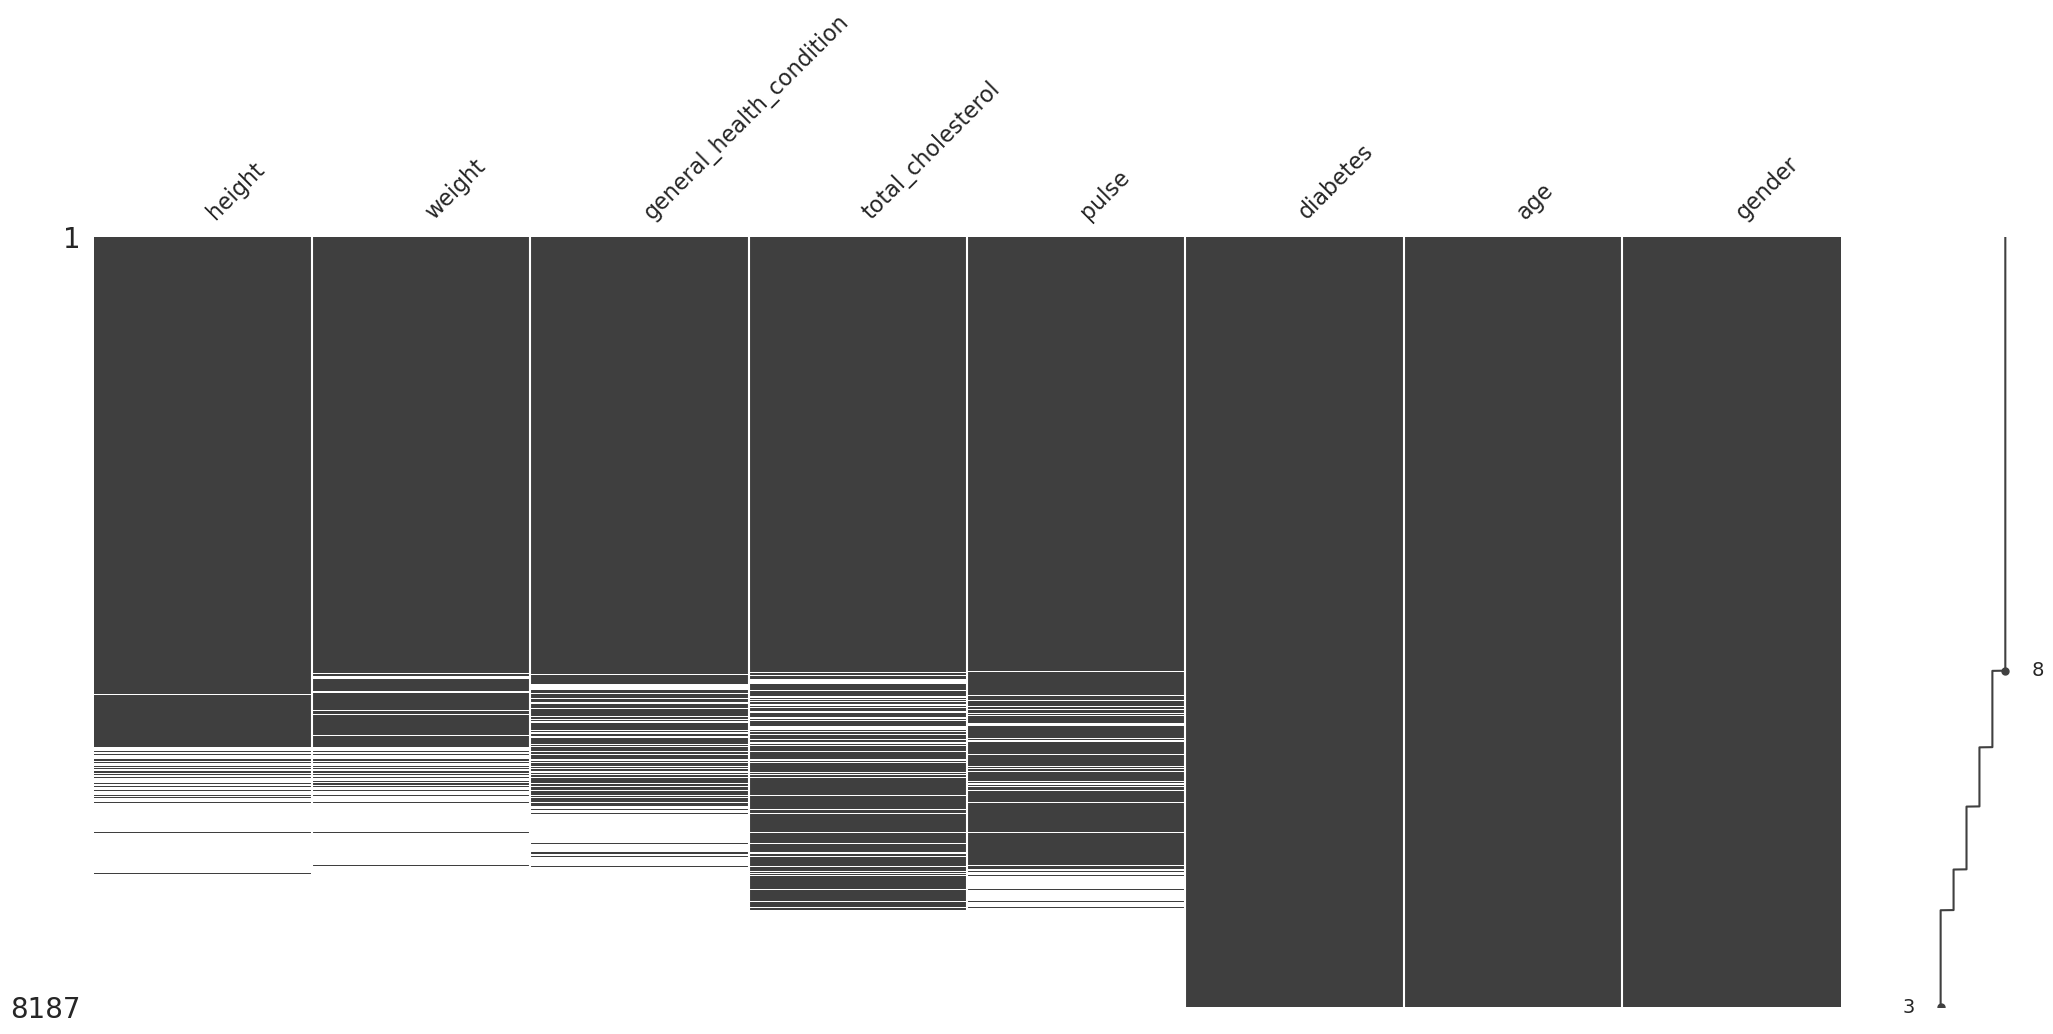

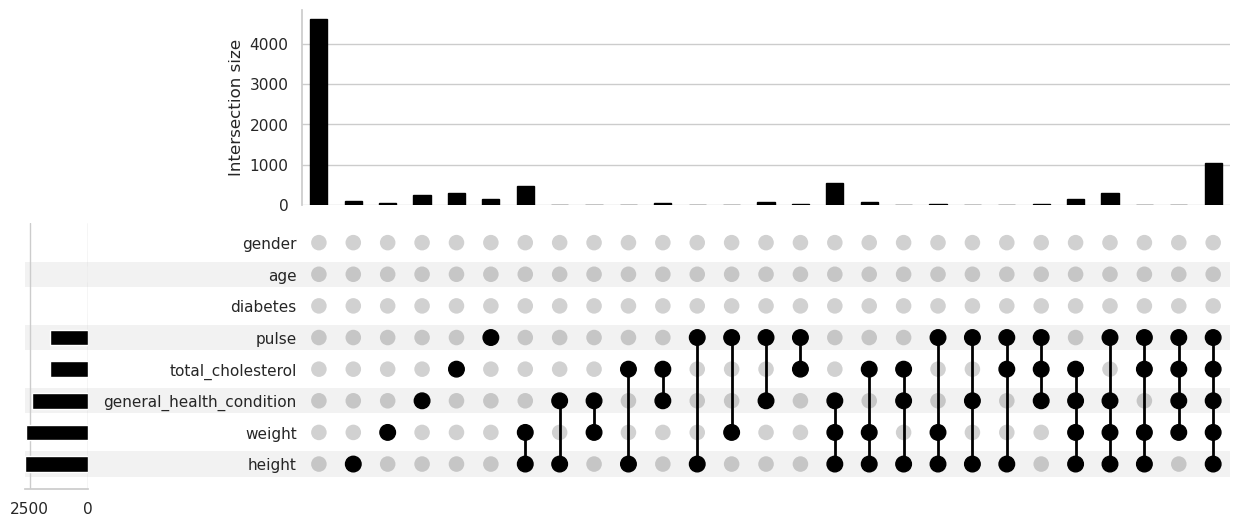

/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/missingno/missingno.py:72: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/missingno/missingno.py:141: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


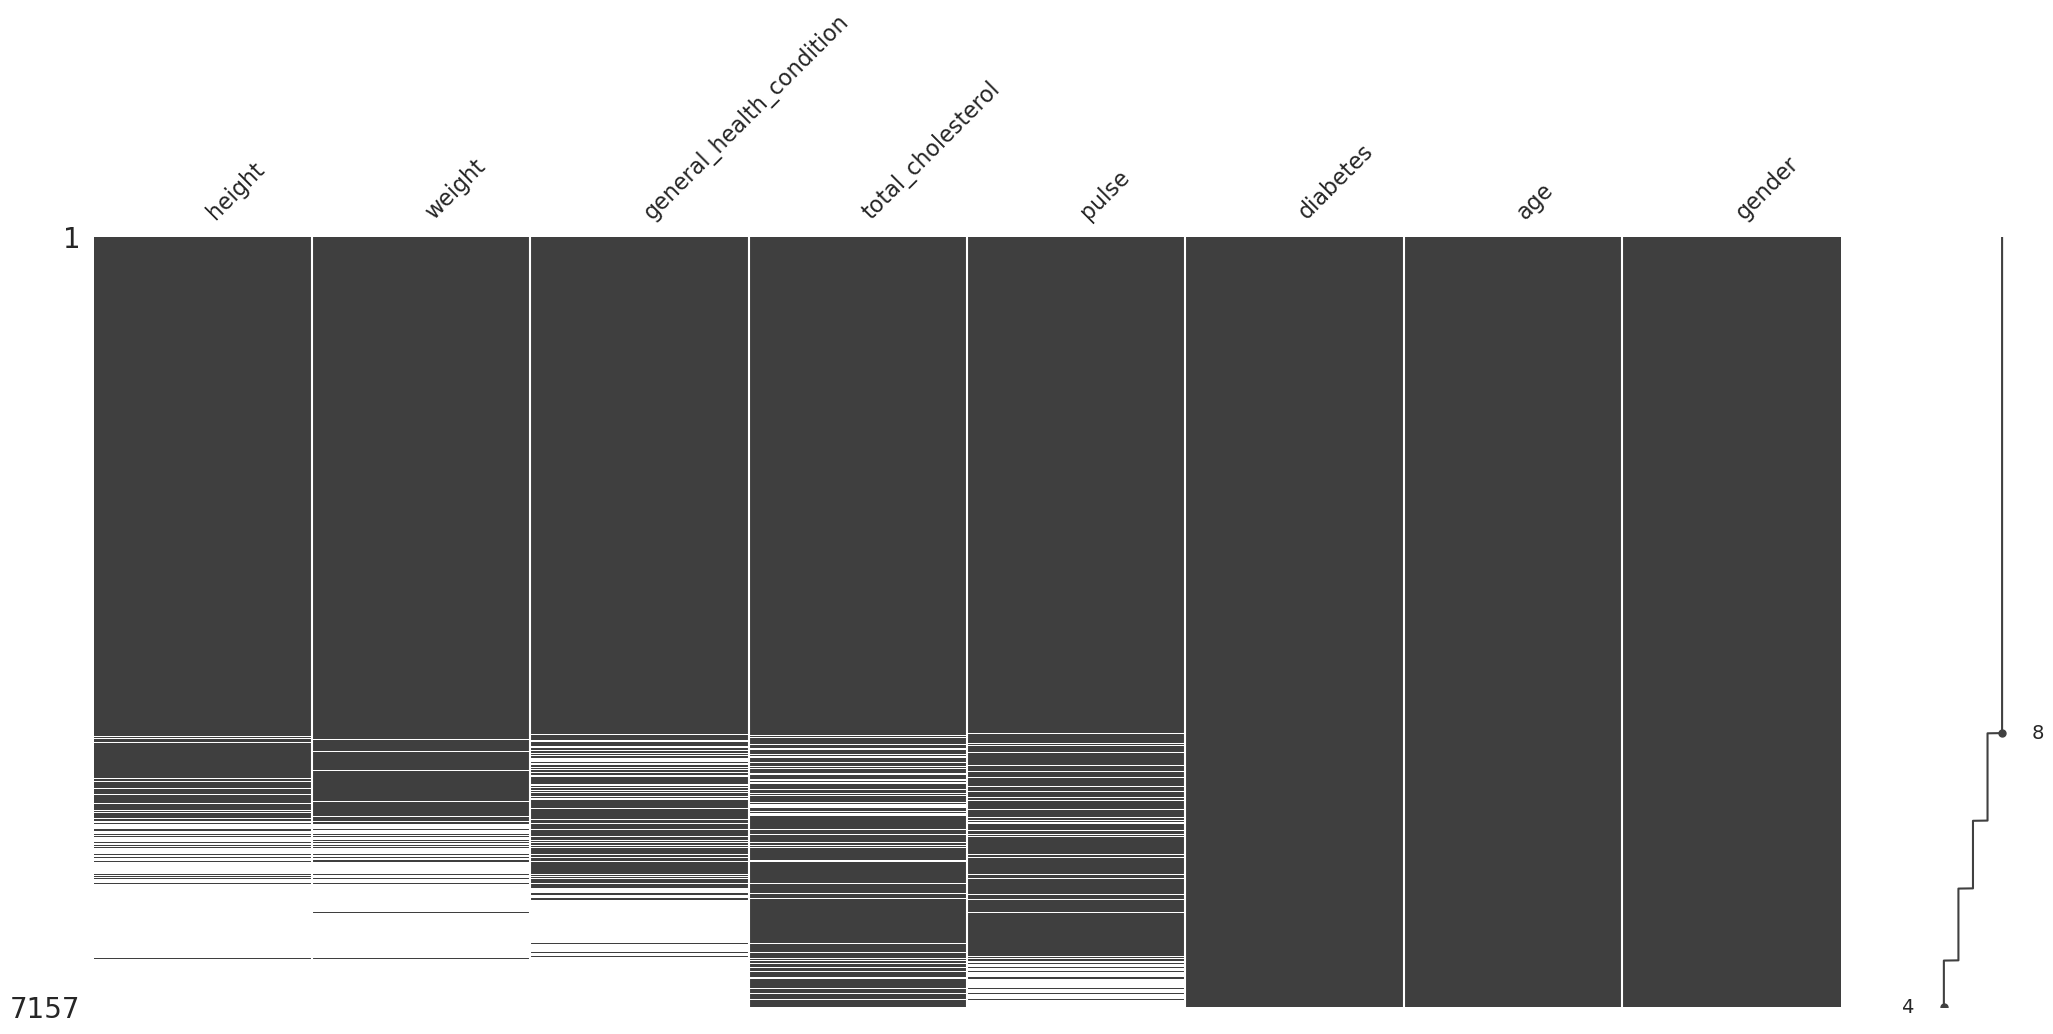

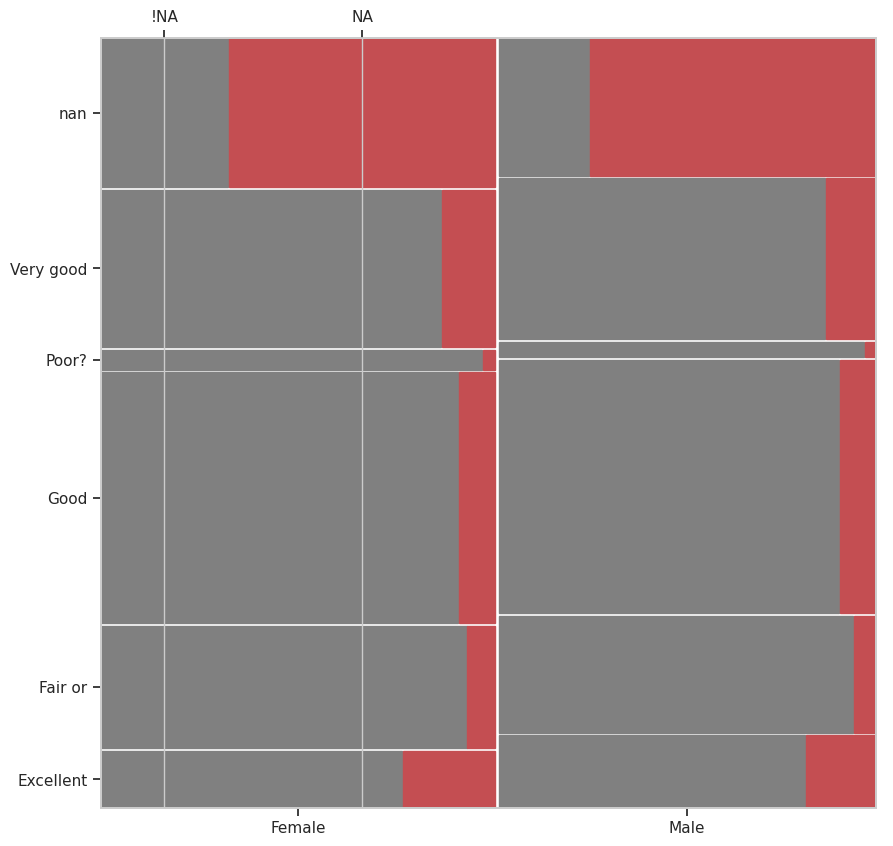

/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)
/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)
/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)
/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.r

In [8]:
%run "0.5-antoniolml-tratamiento-variables-categoricas-imputacion-onehot-encoding.ipynb"

## Tipos de imputación de valores faltantes

## Imputación de un único valor (media, mediana, moda)

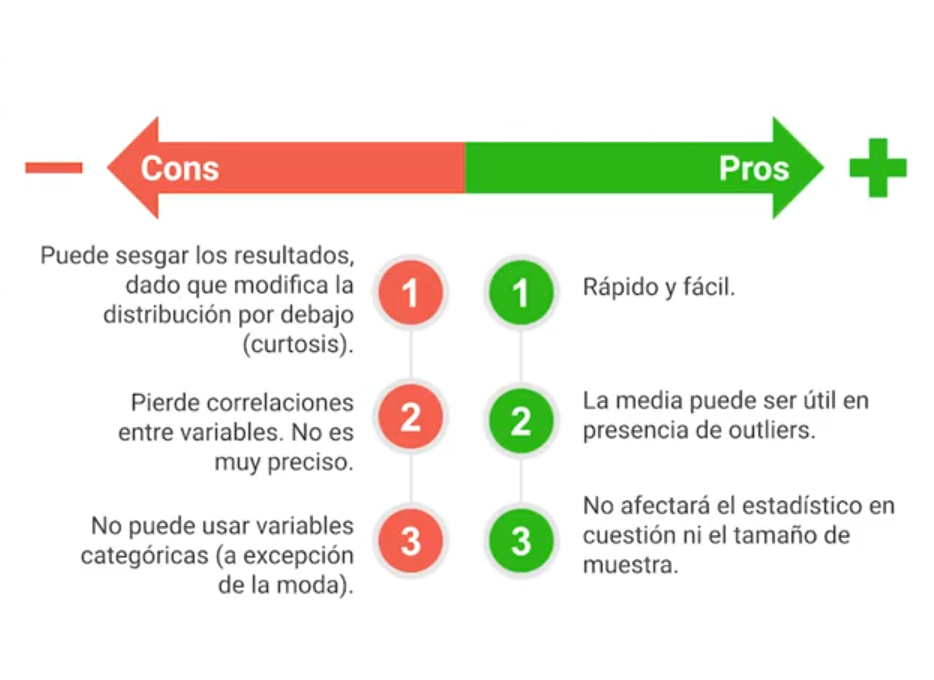

In [9]:
( # imputacion de valores de unico valor
    nhanes_df
    .transform_column( # transformar la columna usando janitor.transform_column
        "height", # columna
        lambda x: x.fillna(x.mean()), # usamos una funcion, para rellenar los valores faltantes usando fillna y la media, de panda
        elementwise=False # especificar si quieres hacer esto para cada elemento o no
    )
    .height # para observar solo esa columna
    .mean() # sacamos el promedio
)

66.25655976676386

<AxesSubplot:xlabel='height', ylabel='weight'>

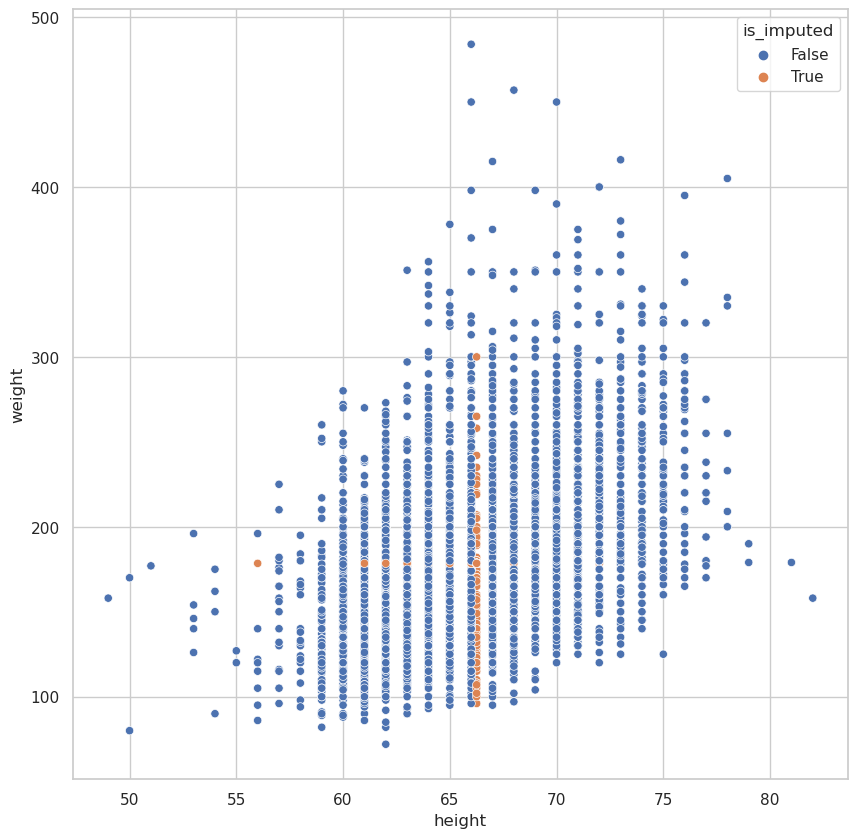

In [10]:
plt.figure(figsize=(10, 10)) # visualizar el contesto

(
    nhanes_df
    .select_columns("height", "weight") # seleccinanos las columna usando janitor.select_columns
    .missing.bind_shadow_matrix(True, False, suffix = "_imp") # funciones, suffix para indicar que estas variables seran imputadas
    .assign( # asignar o editar las variables imputando sus valores 
        height = lambda df: df.height.fillna(value = df.height.mean()), # usamos fillna para rellenar los valores faltantes con la media
        weight = lambda df: df.weight.fillna(value = df.weight.mean())
    )
    .missing.scatter_imputation_plot(x="height", y="weight") # visualizar los datos grafico de imputacion
)

# Los puntos azules son valores no imputados y naranjas imputados, nuestros numeros son discretos. se podria redondear

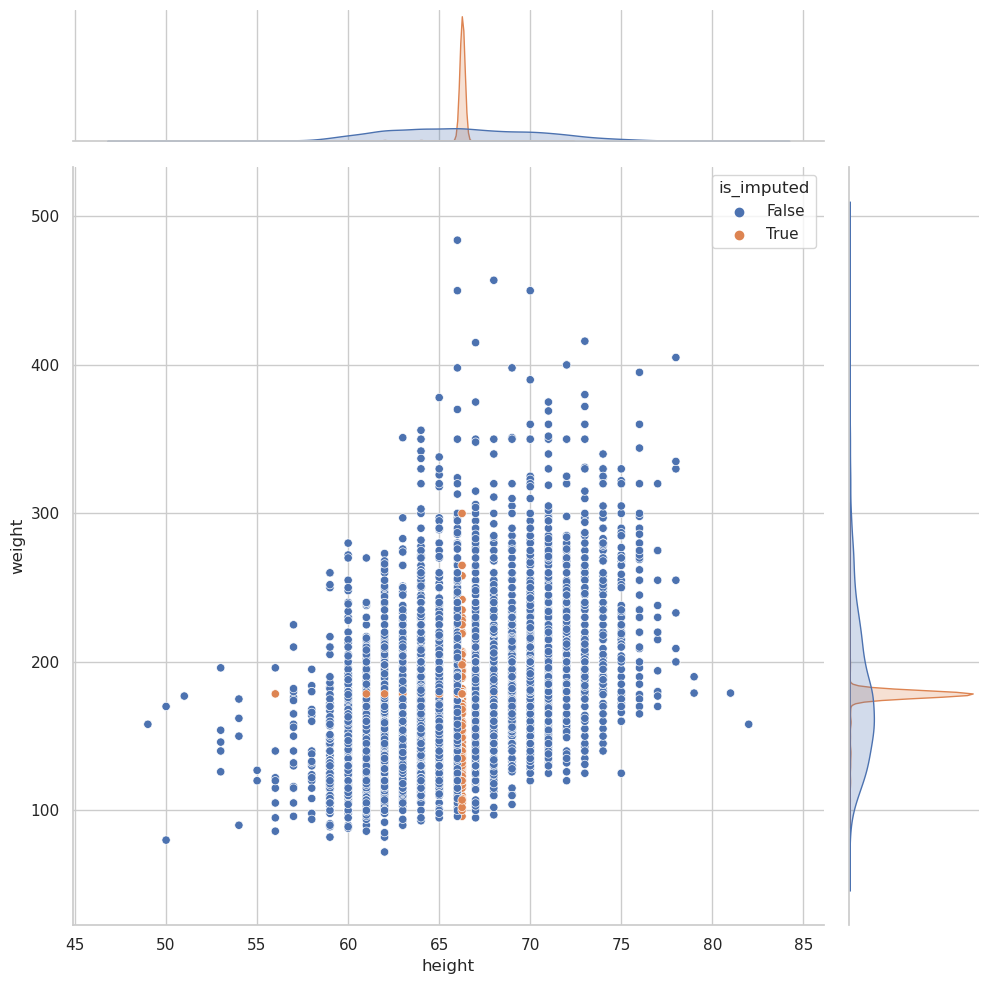

In [11]:
(
    nhanes_df.select_columns("height", "weight")
    .missing.bind_shadow_matrix(True, False, suffix="_imp")
    .assign(
        height=lambda df: df.height.fillna(value=df.height.mean()),
        weight=lambda df: df.weight.fillna(value=df.weight.mean()),
    )
    .missing.scatter_imputation_plot(
        x="height",
        y="weight",
        show_marginal=True, # para que nos muestren la distribucion en los margenes
        height=10 # para espeficifiar el tamaño a la figura
    )
)
